In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy import stats

# Question 1

## **Part 1.1: Work**



#### Read Data

In [393]:
PATH_TO_Q1_DATA = 'data/HW1_Q1_Data.csv'
df = pd.read_csv(PATH_TO_Q1_DATA) 

In [300]:
df.head()

,S IgG1,RBD IgG1,N IgG1,S IgG2,RBD IgG2,N IgG2,S IgG3,RBD IgG3,N IgG3,S IgG4,...,NT50,Sex,Race,Age,Remdesivir,Antibiotics,Chloroquines,Tocilizumab,Ards,Outcome
0,15518.25,11686.50,17408.00,2595.00,2977.5,4418.75,7988.75,10112.75,13740.75,2890.50,...,264.0,Male,Black,60-69,No,Yes,Yes,No,Yes,Died
1,2226.50,2343.25,3379.75,2444.75,3850.5,4687.00,2404.00,3399.00,4383.00,2214.75,...,126.0,Male,White,60-69,No,Yes,Yes,No,Yes,Died
2,2279.75,2450.00,3741.00,2117.00,2321.0,3298.50,2110.75,2256.25,3009.75,2256.75,...,16.0,Female,Asian,80 and older,Yes,No,No,No,No,Died
3,115548.25,93832.00,94973.50,2938.75,2725.0,4380.25,17165.50,14912.00,33445.50,2512.25,...,53.0,Male,Asian,50-59,Yes,Yes,No,No,Yes,Lived
4,2645.00,2479.00,4630.00,2256.75,2408.5,3449.50,2086.00,2452.50,3574.75,2127.00,...,151.0,Female,White,80 and older,Yes,No,No,No,No,Lived


#### Standardize Data in Columns 1-52

In [301]:
'''
 TODO: Standardize columns 1-52 by subtracting off mean of each column and scaling to unit variance
 
'''   
cols = df.iloc[:,:52].columns # get list of columns 1-52
for col in cols:
    if '_zscore' not in col:
        col_zscore = col + '_zscore' # add column for zscore
    df[col_zscore] = (df[col] - df[col].mean())/ df[col].std() # z =(x-μ)/σ  #??std(ddof=??) degrees of freedom

In [302]:
df.head(1)

,S IgG1,RBD IgG1,N IgG1,S IgG2,RBD IgG2,N IgG2,S IgG3,RBD IgG3,N IgG3,S IgG4,...,S ADCD_zscore,RBD ADCD_zscore,N ADCD_zscore,S NKD-CD107a_zscore,RBD NKD-CD107a_zscore,N NKD-CD107a_zscore,S NKD-MIP1b_zscore,RBD NKD-MIP1b_zscore,N NKD-MIP1b_zscore,NT50_zscore
0,15518.25,11686.5,17408.0,2595.0,2977.5,4418.75,7988.75,10112.75,13740.75,2890.5,...,-0.675782,-0.411877,0.450513,-0.02381,-0.180116,-0.576487,-0.586417,-1.100901,-0.542606,1.019302


In [303]:
# get numeric columns
df_zscore = df.iloc[:,61:]
df_zscore.head()

,S IgG1_zscore,RBD IgG1_zscore,N IgG1_zscore,S IgG2_zscore,RBD IgG2_zscore,N IgG2_zscore,S IgG3_zscore,RBD IgG3_zscore,N IgG3_zscore,S IgG4_zscore,...,S ADCD_zscore,RBD ADCD_zscore,N ADCD_zscore,S NKD-CD107a_zscore,RBD NKD-CD107a_zscore,N NKD-CD107a_zscore,S NKD-MIP1b_zscore,RBD NKD-MIP1b_zscore,N NKD-MIP1b_zscore,NT50_zscore
0,-0.327784,-0.327417,-0.390835,-0.430222,-0.410582,-0.423640,-0.069492,-0.205854,-0.276218,-0.418283,...,-0.675782,-0.411877,0.450513,-0.023810,-0.180116,-0.576487,-0.586417,-1.100901,-0.542606,1.019302
1,-0.388406,-0.383136,-0.448371,-0.445330,-0.359239,-0.409801,-0.628774,-0.437607,-0.343531,-0.607598,...,-0.902038,-0.965508,-0.831518,-0.775527,-0.799010,-0.764606,-1.617719,-1.100901,-1.061439,-0.272266
2,-0.388163,-0.382500,-0.446890,-0.478285,-0.449192,-0.481434,-0.658142,-0.477053,-0.353409,-0.595831,...,-1.280099,-1.033968,-0.560026,0.142907,1.699490,-0.285057,0.513107,0.713034,-0.099106,-1.301777
3,0.128434,0.162469,-0.072702,-0.395658,-0.425432,-0.425626,0.849509,-0.040188,-0.134474,-0.524252,...,0.104725,-0.648830,-2.040266,-0.363199,-0.771504,-0.323606,-0.667148,-0.352029,0.036981,-0.955487
4,-0.386497,-0.382327,-0.443244,-0.464233,-0.444046,-0.473643,-0.660620,-0.470279,-0.349345,-0.632182,...,-0.370782,-1.398593,-2.056404,-0.867817,-0.565206,-0.781568,-1.120830,0.061931,-1.061439,-0.038286


#### Cluster Standardized Data in Columns 1-52

In [304]:


# how to choose distance measure?? 
# way to keep label columns with numeric??
# how to use other quality metrics if we don't know what true labels are??


possible_cluster_nums = [2,3,4,5,6,7,8,9,10] # 1 < k < 11

results = []
for k in possible_cluster_nums:
    '''
    TODO: 1. Fit data to k clusters using imported clustering algorithm
          2. Compute quality of results for k clusters using imported
             cluster quality metric and store in a list
    '''
    kmeans = KMeans(n_clusters=k).fit(df_zscore)
    labels = kmeans.labels_ #is this the cluster it ends up in??
    score = metrics.silhouette_score(df_zscore, labels) #quality
    results.append(score)
    
#     print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#     print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#     print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#     print("Adjusted Rand Index: %0.3f"
#           % metrics.adjusted_rand_score(labels_true, labels))
#     print("Adjusted Mutual Information: %0.3f"
#           % metrics.adjusted_mutual_info_score(labels_true, labels))
#     print("Silhouette Coefficient: %0.3f"
#           % metrics.silhouette_score(df_zscore, labels))

results

[0.596020600071851,
 0.2896940008974808,
 0.2947681275498017,
 0.2894987853463593,
 0.2975457234378132,
 0.3215548320307516,
 0.25967781946908175,
 0.26247277750104236,
 0.23981706885378748]

In [305]:
# dimensionality reduction and visualization
## how to connect true labels to this??

pca = PCA(n_components=2).fit_transform(df_zscore)
df_plot = pd.DataFrame(pca, columns=['pca1','pca2'])
df_plot.head()

,pca1,pca2
0,-2.928040,3.900730
1,-5.351742,4.966922
2,-4.941026,2.733098
3,-2.863161,5.833311
4,-5.368426,3.700281


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

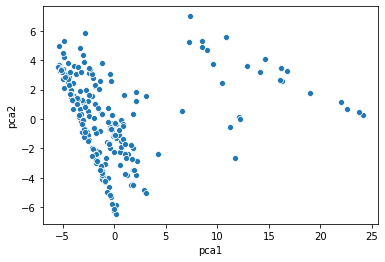

In [306]:
sns.scatterplot(x='pca1', y='pca2', data=df_plot, legend='full')

#### Visualize Cluster Quality Metrics

In [307]:
# Creates line chart to visualize values of cluster quality metric for each possible number of clusters
def plotMetricByK(metric_name, metric_results, PATH_TO_SAVE=None):
  '''
  metric_name: Name of cluster quality metric for title and axis label
  metric_results: List containing value of metric, in order, for each
                  possible number of clusters
  PATH_TO_SAVE: Path of file to save plot. If path is not provided, image is not saved
  '''

  plt.clf()

  plt.title(f'{metric_name} by Number of Clusters')
  plt.xlabel('Number of Clusters')
  plt.ylabel(metric_name)
  plt.plot(possible_cluster_nums, metric_results)
  
  if PATH_TO_SAVE:
    plt.savefig(PATH_TO_SAVE)

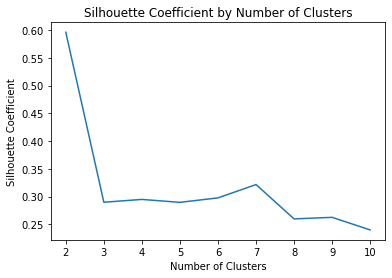

In [308]:
'''
 TODO: Plot your choice of cluster quality metric by cluster number to help determine k.

 TIP: If using the above function, place each function call in a separate 
      cell to visualize multiple cluster quality metrics
'''
plotMetricByK("Silhouette Coefficient", results)

## **Part 1.1: Answer**

How many clusters are there in the data? **There appear to be two clusters.**

Explanation: **Good clustering is indicated when the Silhouette Coefficient is close to 1. The Silhouette Coefficient is closest to 1 for two clusters and is much lower for other clustering sizes.**

## **Part 1.2: Work**

#### Cluster Data

In [309]:
'''
  TODO: Cluster data with the number of clusters you determined in part 1.1 and store resulting labels
'''

#perform kmeans again for the right size??
#important to keep original label columns??
kmeans_2 = KMeans(n_clusters=2).fit(df_zscore)
labels = kmeans_2.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [313]:
# add labels as column in data??
df_clustered = pd.DataFrame(df_zscore)
df_clustered['cluster']=labels
df_clustered.head()

,S IgG1_zscore,RBD IgG1_zscore,N IgG1_zscore,S IgG2_zscore,RBD IgG2_zscore,N IgG2_zscore,S IgG3_zscore,RBD IgG3_zscore,N IgG3_zscore,S IgG4_zscore,...,RBD ADCD_zscore,N ADCD_zscore,S NKD-CD107a_zscore,RBD NKD-CD107a_zscore,N NKD-CD107a_zscore,S NKD-MIP1b_zscore,RBD NKD-MIP1b_zscore,N NKD-MIP1b_zscore,NT50_zscore,cluster
0,-0.327784,-0.327417,-0.390835,-0.430222,-0.410582,-0.423640,-0.069492,-0.205854,-0.276218,-0.418283,...,-0.411877,0.450513,-0.023810,-0.180116,-0.576487,-0.586417,-1.100901,-0.542606,1.019302,0
1,-0.388406,-0.383136,-0.448371,-0.445330,-0.359239,-0.409801,-0.628774,-0.437607,-0.343531,-0.607598,...,-0.965508,-0.831518,-0.775527,-0.799010,-0.764606,-1.617719,-1.100901,-1.061439,-0.272266,0
2,-0.388163,-0.382500,-0.446890,-0.478285,-0.449192,-0.481434,-0.658142,-0.477053,-0.353409,-0.595831,...,-1.033968,-0.560026,0.142907,1.699490,-0.285057,0.513107,0.713034,-0.099106,-1.301777,0
3,0.128434,0.162469,-0.072702,-0.395658,-0.425432,-0.425626,0.849509,-0.040188,-0.134474,-0.524252,...,-0.648830,-2.040266,-0.363199,-0.771504,-0.323606,-0.667148,-0.352029,0.036981,-0.955487,0
4,-0.386497,-0.382327,-0.443244,-0.464233,-0.444046,-0.473643,-0.660620,-0.470279,-0.349345,-0.632182,...,-1.398593,-2.056404,-0.867817,-0.565206,-0.781568,-1.120830,0.061931,-1.061439,-0.038286,0


#### Univariate Analysis

In [292]:
'''
  TODO: Find 4 variables that have statistically significant differences between values in the clusters (i.e p < 0.05 using pairwise t-tests)
'''

# shapiro ??
stats.shapiro(df_zscore['S IgG1_zscore'])

ShapiroResult(statistic=0.4250958561897278, pvalue=1.2075103120681761e-26)

In [326]:
# split the data into separate dataframes based on cluster??

# do I need to split the data into separate dataframes per cluster??
df_cluster0=df_clustered[df_clustered['cluster']==0]
df_cluster0.count

df_cluster1=df_clustered[df_clustered['cluster']==1]
df_cluster1.count

<bound method DataFrame.count of     S IgG1_zscore  RBD IgG1_zscore  N IgG1_zscore  S IgG2_zscore  \
12       3.401509         3.500628       2.215323       2.616428   
20      -0.040346        -0.247906       1.667698       1.003362   
22       3.405043         3.506204       2.221513       2.684968   
23       3.408416         3.511525       2.227420       2.750384   
25       3.411893         3.517010       2.233510       2.817811   
27       3.574269         3.459611       4.214582       4.149519   
28       3.699144         3.624600       3.985054       4.024373   
29      -0.054058        -0.238707       1.532296       1.126807   
30       1.898068         1.740329       3.033519       2.690556   
31       1.443318         1.273891       2.713098       2.294742   
34       3.591966         3.579958       3.347776       3.517375   
35       1.991037         2.060991       1.234937       1.626637   
36       3.242677         3.119497       3.980940       3.860902   
37       3.4728

In [371]:
# Welch's t-test
# p-value
# degrees of freedom??
# what to do with this data??
# all my columns have low p-values??
# look at original data or standardized data??
cols = df_cluster0.iloc[:,:-1].columns
pvalues=[]
for col in cols:
    (stat,pvalue) = stats.ttest_ind(df_cluster0[col], df_cluster1[col], equal_var=False)
    pvalues.append(float(pvalue))
    print('column: %-21s pvalue: %.10f' % (col,pvalue))

column: S IgG1_zscore         pvalue: 0.0000000002
column: RBD IgG1_zscore       pvalue: 0.0000000009
column: N IgG1_zscore         pvalue: 0.0000000000
column: S IgG2_zscore         pvalue: 0.0000000000
column: RBD IgG2_zscore       pvalue: 0.0000000000
column: N IgG2_zscore         pvalue: 0.0000000000
column: S IgG3_zscore         pvalue: 0.0000000000
column: RBD IgG3_zscore       pvalue: 0.0000000023
column: N IgG3_zscore         pvalue: 0.0000006285
column: S IgG4_zscore         pvalue: 0.0000000077
column: RBD IgG4_zscore       pvalue: 0.0000002160
column: N IgG4_zscore         pvalue: 0.0000004009
column: S IgA1_zscore         pvalue: 0.0000000000
column: RBD IgA1_zscore       pvalue: 0.0000000000
column: N IgA1_zscore         pvalue: 0.0000000103
column: S IgA2_zscore         pvalue: 0.0000000003
column: RBD IgA2_zscore       pvalue: 0.0000000000
column: N IgA2_zscore         pvalue: 0.0000000000
column: S IgM_zscore          pvalue: 0.0000000000
column: RBD IgM_zscore        p

In [372]:
np.sort(pvalues)

array([1.65034514e-25, 2.25892527e-15, 4.53873510e-15, 5.94927821e-15,
       1.79577610e-14, 2.19844774e-14, 3.49072496e-14, 4.00278991e-14,
       4.80850844e-14, 2.14180639e-13, 3.63486498e-13, 7.50385130e-13,
       1.25776799e-12, 1.38844425e-12, 1.84662097e-12, 2.62438263e-12,
       5.42320117e-12, 1.13718082e-11, 1.17722311e-11, 3.36182261e-11,
       1.20728715e-10, 1.27347205e-10, 1.64751498e-10, 2.14904198e-10,
       3.13942962e-10, 4.89048061e-10, 8.68893261e-10, 9.63360206e-10,
       2.10790992e-09, 2.26505113e-09, 5.17759478e-09, 7.11267508e-09,
       7.67571310e-09, 1.03229430e-08, 2.29219008e-08, 3.27898210e-08,
       4.29230933e-08, 2.16015766e-07, 4.00867128e-07, 6.28498483e-07,
       2.03872899e-06, 4.69475066e-06, 1.59840175e-05, 4.45293606e-05,
       2.10940070e-03, 3.94577594e-02, 1.45329920e-01, 3.08958741e-01,
       5.28391317e-01, 5.76958110e-01, 7.77626496e-01, 9.57972881e-01])

**Part 1.2: Answer**

VARIABLE 1, VARIABLE 2, VARIABLE 3, VARIABLE 4
S IgG1_zscore, RBD IgG1_zscore, N IgG1_zscore, S IgG2_zscore //dummy values for now

**Replace the above line with 4 variables that you found from the univariate analysis and output the corresponding box plots in the cells below or as images in this cell**

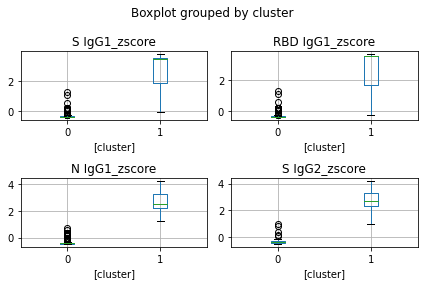

In [378]:
'''
  TODO: Create and display boxplots for each of the 4 variables like those in Fig 1. from the paper by Wu et al

  TIP: 1. If you add the cluster labels as an additional column to the dataframe, then you can follow the example at https://www.pythonprogramming.in/boxplot-group-by-column-data.html
       2. If you want to use subplots to put all 4 boxplots in the same figure, you can plot the dataframes on a specific subplot using the ax keyword. For example,
          
          fig, axs = plt.subplots(2, 2)

          df.boxplot(column=['Variable'], by=['Cluster'], ax=axs[0,0])
          df.boxplot(column=['Variable'], by=['Cluster'], ax=axs[0,1])
''' 

# how to fix labels?
# is this how it should look??
# use standardized data??
fig, axs = plt.subplots(2,2)

df_zscore.boxplot(column=['S IgG1_zscore'], by=['cluster'], ax=axs[0,0])
df_zscore.boxplot(column=['RBD IgG1_zscore'], by=['cluster'], ax=axs[0,1])
df_zscore.boxplot(column=['N IgG1_zscore'], by=['cluster'], ax=axs[1,0])
df_zscore.boxplot(column=['S IgG2_zscore'], by=['cluster'], ax=axs[1,1])

plt.tight_layout()

## **Part 1.3: Work**


In [382]:
# Formats Pandas series to string of form 'index_1: value_1, ..., index_n:, value_n' w/ indexes alphabetically sorted
def formatValueCounts(value_counts):
  '''
    value_counts: Pandas series
  '''
  count_string = value_counts.to_string()
  formatted_counts = [': '.join(count.split()) for count in count_string.split('\n')]
  formatted_counts.sort()
  return ', '.join(formatted_counts)

# Creates table summarizing data by cluster and categorical feature
def plotSummaryTable(cellText, PATH_TO_SAVE=None):
  '''
  cellText: num_clusters x 9 2D List where cellText[i][j] contains a string summarizing
            the statistics for cluster i and column (53 + j) in the data
  PATH_TO_SAVE: Path of file to save plot. If path is not provided, image is not saved
  '''

  k = len(cellText)
  colLabels = [f'Cluster {i + 1}' for i in range(k)]

  rowLabels = list(df.columns)[52:61]

  cellText = np.array(cellText).T

  plt.figure(figsize=(10,10))
  table = plt.table(cellText, 
              colLabels=colLabels,
              colColours=['#D3D3D3'] * len(colLabels),
              rowLabels=rowLabels,
              rowColours=['#D3D3D3'] * len(rowLabels),
              cellLoc='center',
              loc='upper center')
  table.scale(2,5)
  table.auto_set_font_size(False)
  table.set_fontsize(12)

  plt.axis('off')
  plt.grid(False)

  if PATH_TO_SAVE:
    plt.savefig(PATH_TO_SAVE)

In [396]:
'''
  TODO: Create a table where the rows correspond to the variables in columns 53-61, and the columns correspond to the k clusters you identified.
        For each cell in the table, put summary statistics for that (variable, cluster) pair

  TIP: 1. If you create a 2D list, cellText, where cellText[i][j] contains a string summarizing the statistics for cluster i and column (53 + j) in
          the data, you can pass this into plotSummaryTable (provided above) to automatically create the table with matplotlib
       2. If you use value_counts() from Pandas, you can pass the resulting series to formatValueCounts (provided above) to convert it to a formatted string
'''
#'Sex','Race', 'Age', 'Remdesivir', 'Antibiotics', 'Chloroquines','Tocilizumab', 'Ards', 'Outcome'

# cellTest = [[0,1],['Sex','Age']]
# cellTest[]

Index(['Sex', 'Race', 'Age', 'Remdesivir', 'Antibiotics', 'Chloroquines',
       'Tocilizumab', 'Ards', 'Outcome'],
      dtype='object')

## **Part 1.3: Answer**

**Plot the table in one of the above cells or include it as an image in this cell**

Are any of the clusters significantly enriched for some particular value? **YOUR ANSWER HERE**



## **Part 1.4: Work**

In [ ]:
'''
TODO: Cluster the numeric variables (Columns 1-52)
'''

## **Part 1.4: Answer**

How many clusters are there in the numeric variables? **YOUR ANSWER HERE** 

Explanation: **Please make sure any relevant plots are either included in the above cells or embedded in this cell and replace this line with a brief explanation of how they justify your choice**

## **Part 1.5: Work**

In [ ]:
'''
TODO: 1. Choose a representative variable from each cluster you determined in Part 1.4
         and create a low-dimensional version of the data using those variables
      2. Re-cluster the data using the reduced representation using the same 
         choices you made for part 1.1.
'''

## **Part 1.5: Answer**

Representative Variables: **Replace this with the representative variables you chose using your work from Part 1.4** 

How many clusters are there in the numeric variables? **YOUR ANSWER HERE** 

Explanation: **Please make sure any relevant plots are either included in the above cells or linked in this cell and replace this line with a brief explanation of how they justify your choice**

## **Part 1.6: Work**

In [ ]:
'''
  TODO: Create a table where the rows correspond to the variables in columns 53-61, and the columns correspond to the k clusters you identified.
        in part 1.5. For each cell in the table, put summary statistics for that (variable, cluster) pair
'''

## **Part 1.6: Answer**

**Plot the table in one of the above cells or include it as an image in this cell**

Are any of the clusters significantly enriched for some particular value? **YOUR ANSWER HERE**